Author : Muhammmad Nidzam  
This project is  using Mushroom dataset https://www.kaggle.com/akshaymewada7/mushroom/data . The purpose of this project to do classification od edible ot edible.
Topic to cover  
1) Data massaging(EDA)  
https://www.kaggle.com/akshaymewada7/mushroom/code  

 




## Data pre-processing (EDA)

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import sklearn as sk
import scipy.stats as stats
import time
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

In [70]:
mushroom= pd.read_csv('C:/Users/masoodm/Desktop/UTM BI and Analytics/Machine Learning/mushrooms.csv',na_values=[" "])

In [71]:
print('Check null')
print(mushroom.isnull().sum())

Check null
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


No NA/null data detected

In [72]:
print('Check data type')
print(mushroom.dtypes)

Check data type
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [73]:
mushroom.shape

(8124, 23)

This data set contains 8124 rows and 23 columns

In [74]:
mushroom['class'].unique()

array(['p', 'e'], dtype=object)

For data labels, we have two types which is p foor 'poisonous' and e for 'edible'

In [6]:
mushroom.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Metadata  
Attribute Information: (classes: edible=e, poisonous=p)  
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s  
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s  
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y  
bruises: bruises=t,no=f  
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s  
gill-attachment: attached=a,descending=d,free=f,notched=n   
gill-spacing: close=c,crowded=w,distant=d  
gill-size: broad=b,narrow=n    
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,   green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y  
stalk-shape: enlarging=e,tapering=t  
stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?  
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s  
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s  
stalk-color-above-ring:brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y   
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y  
veil-type: partial=p,universal=u  
veil-color: brown=n,orange=o,white=w,yellow=y  
ring-number: none=n,one=o,two=t  
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z  
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y  
population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y  
habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d  

In [77]:
mushroom.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


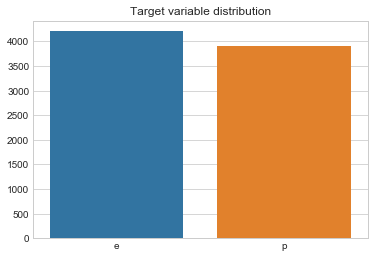

In [75]:
sns.set_style('whitegrid')
target_dist = mushroom['class'].value_counts()
sns.barplot(target_dist.index, target_dist.values)
plt.title('Target variable distribution');

In [7]:
# Number of CLasses Counts
mushroom['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

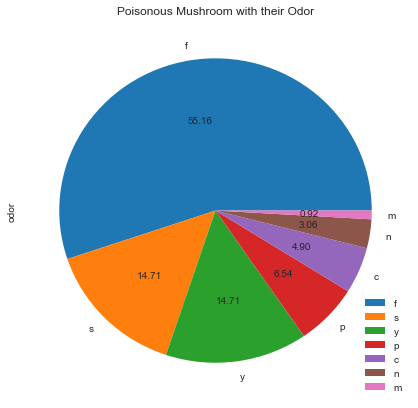

In [79]:
# Getting all Poisonous Mushroom odor   
Poisonous_Odor = mushroom[mushroom['class']=='p']['odor'].value_counts()

# Showing With Pie Chart Poisonous_Odor
Poisonous_Odor.plot(kind='pie',figsize=(7,7),legend=True,fontsize=10,
                    autopct='%.2f',title='Poisonous Mushroom with their Odor')

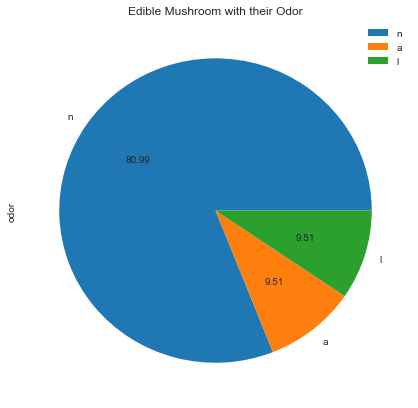

In [81]:
# Getting all Edible Mushroom odor
Edible_Odor = mushroom[mushroom['class']=='e']['odor'].value_counts()

# Showing with Pie Chart Edible_Odor
Edible_Odor.plot(kind='pie',figsize=(7,7),legend=True,fontsize=10, 
                 autopct='%.2f',title='Edible Mushroom with their Odor')

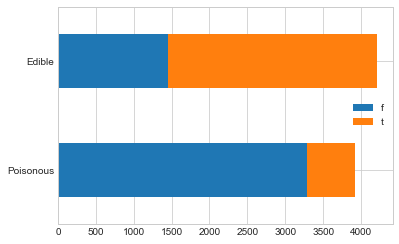

In [82]:
# Bruises Mushrooms :  
# t: Bruises:True
# f: No Bruises: False
Poisonous_Bruises = mushroom[mushroom['class']== 'p']['bruises'].value_counts()
Edible_Bruises = mushroom[mushroom['class']== 'e']['bruises'].value_counts()

Bruises = pd.DataFrame([Poisonous_Bruises,Edible_Bruises],
                       index=['Poisonous','Edible'])
Bruises.plot(kind = 'barh',stacked = True,)

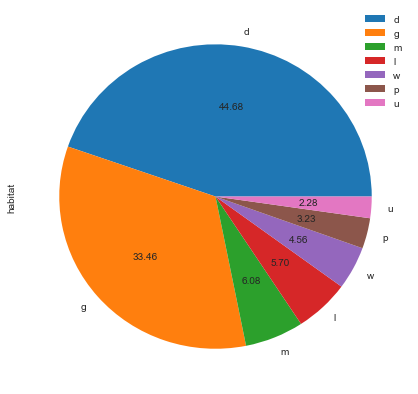

In [83]:
# Analysing Habitat for Edible Mushroom:
Edible_habitate = mushroom[mushroom['class'] == 'e']['habitat'].value_counts()
Edible_habitate.plot(kind = 'pie',figsize=(7,7),legend=True,fontsize=10, 
                 autopct='%.2f')

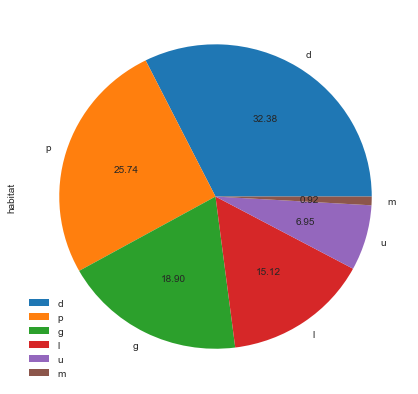

In [85]:
# Analysing Habitat for Poisonous Mushroom:
Poisonous_habitate = mushroom[mushroom['class'] == 'p']['habitat'].value_counts()
Poisonous_habitate.plot(kind = 'pie',figsize=(7,7),legend=True,fontsize=10, 
                 autopct='%.2f')

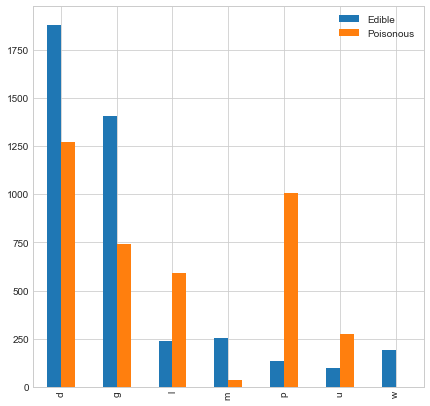

In [86]:
# Vice Versa plot 
Habit = pd.DataFrame([Edible_habitate,Poisonous_habitate],index=['Edible','Poisonous'])
Habit = Habit.transpose()
Habit.plot(kind= 'bar',figsize=(7,7))

4208 edible and 3916 is poisonous

In [8]:
 # Data Normalization
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in mushroom.columns:
    mushroom[column] = label_encoder.fit_transform(mushroom[column])
mushroom.head()    

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
#seperating data and labels
Label = mushroom['class']
Features = mushroom.drop(['class'],axis=1)

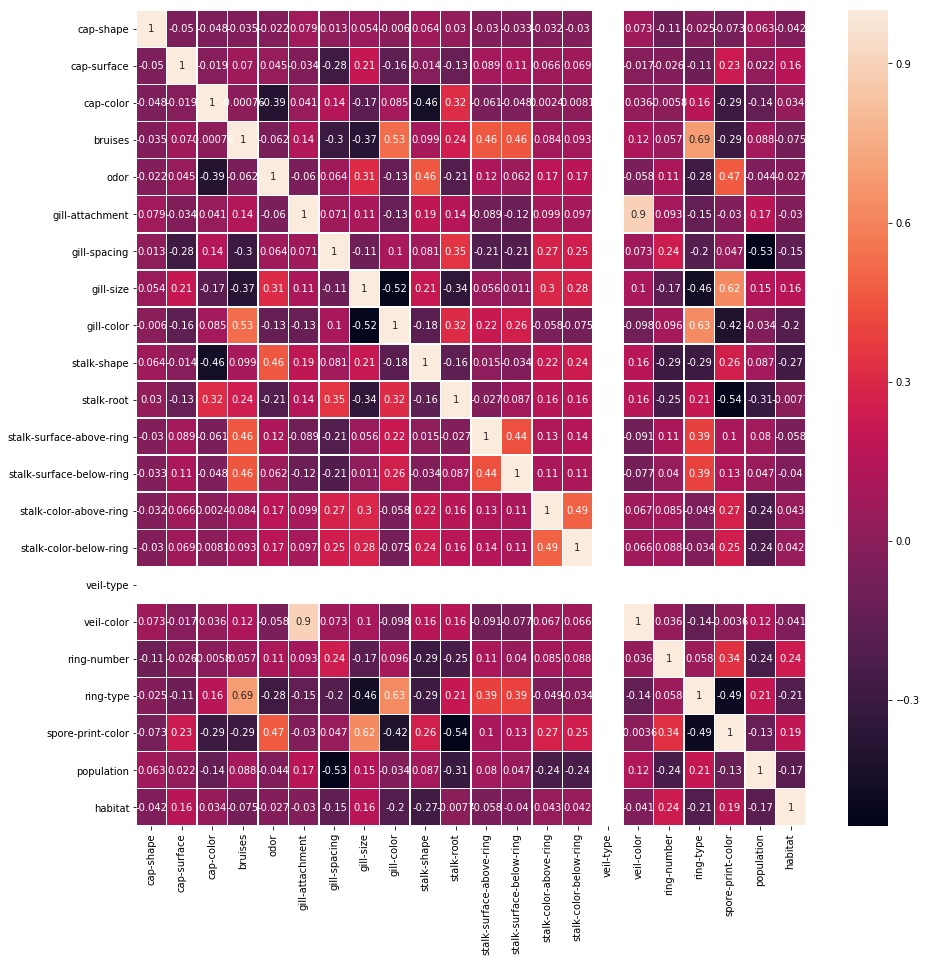

In [10]:
#Checking correlation and plot it
import seaborn as sns
Features.corr()
plt.figure(figsize=(15,15))
sns.heatmap(Features.corr(), annot=True, linewidths=.5,)

Veil-type has a high multicollinearity with the rest of the variable. However this will not be an issues since our objective for machine learning it to predict the accuracy of the classification.

## Classification of Mushrooom Using Different Machine Learning Model (test split method)

In [38]:
# Splitting data to Train and Test 
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Features,Label,test_size=0.3,random_state = 125)

In [39]:
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('GaussianNB',GaussianNB()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('SVC',SVC()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
names = []

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve


for name,model in models: 
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    %timeit model.fit(X_train,y_train)
    print (name)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test, y_pred))

68.9 ms ± 9.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
LogisticRegression
[[1227   61]
 [  57 1093]]
             precision    recall  f1-score   support

          0       0.96      0.95      0.95      1288
          1       0.95      0.95      0.95      1150

avg / total       0.95      0.95      0.95      2438

4.65 ms ± 335 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
GaussianNB
[[1173  115]
 [  76 1074]]
             precision    recall  f1-score   support

          0       0.94      0.91      0.92      1288
          1       0.90      0.93      0.92      1150

avg / total       0.92      0.92      0.92      2438

15.9 ms ± 2.36 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
KNeighborsClassifier
[[1283    5]
 [   0 1150]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1288
          1       1.00      1.00      1.00      1150

avg / total       1.00      1.00      1.00      2438

412 ms ± 

## Classification of Mushrooom Using Different Machine Learning Model (Cross Validation method)

In [41]:
# Cross validiation accuracy
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('GaussianNB',GaussianNB()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('SVC',SVC()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
from sklearn.cross_validation import cross_val_score
acc = []
names = []
result = []

for name, model in models:
    
    acc_of_model = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
#    %timeit cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    acc.append(acc_of_model)

    names.append(name)
    
    Out = "%s: %f (%f)" % (name, acc_of_model.mean(), acc_of_model.std())
    result.append(acc_of_model)
    print(Out)

LogisticRegression: 0.953921 (0.007987)
GaussianNB: 0.923142 (0.007197)
KNeighborsClassifier: 0.998241 (0.001363)
SVC: 1.000000 (0.000000)
DecisionTreeClassifier: 1.000000 (0.000000)
RandomForestClassifier: 1.000000 (0.000000)


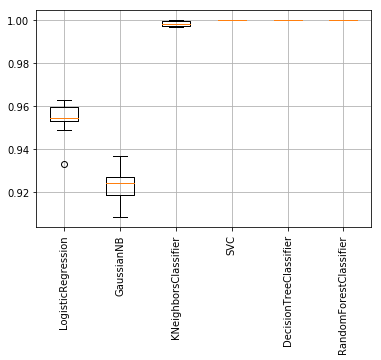

In [42]:
plt.grid()
plt.boxplot(result)
plt.xticks(range(1,len(names)+1),names,rotation= 90)
plt.show()

In [43]:
# Cross validiation recall/sensitivity
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('GaussianNB',GaussianNB()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('SVC',SVC()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))

sensitivity = []
names = []
result = []

for name, model in models:
    
    recall_of_model = cross_val_score(model, X_train, y_train, cv=10, scoring='recall')
    
    sensitivity.append(recall_of_model)

    names.append(name)
    
    Out = "%s: %f (%f)" % (name, recall_of_model.mean(), recall_of_model.std())
    result.append(recall_of_model)
    print(Out)

LogisticRegression: 0.945047 (0.017578)
GaussianNB: 0.919381 (0.015332)
KNeighborsClassifier: 0.998916 (0.001656)
SVC: 1.000000 (0.000000)
DecisionTreeClassifier: 1.000000 (0.000000)
RandomForestClassifier: 1.000000 (0.000000)


In [44]:

# Cross validiation sensityity
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('GaussianNB',GaussianNB()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('SVC',SVC()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))

sensitivity = []
names = []
result = []

for name, model in models:
    
    recall_of_model = cross_val_score(model, X_train, y_train, cv=10, scoring='recall')
    
    sensitivity.append(recall_of_model)

    names.append(name)
    
    Out = "%s: %f (%f)" % (name, recall_of_model.mean(), recall_of_model.std())
    result.append(recall_of_model)
    print(Out)

LogisticRegression: 0.945047 (0.017578)
GaussianNB: 0.919381 (0.015332)
KNeighborsClassifier: 0.998916 (0.001656)
SVC: 1.000000 (0.000000)
DecisionTreeClassifier: 1.000000 (0.000000)
RandomForestClassifier: 1.000000 (0.000000)


In [45]:
# Cross validiation precision
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('GaussianNB',GaussianNB()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('SVC',SVC()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))

precision = []
names = []
result = []

for name, model in models:
    
    precision_of_model = cross_val_score(model,X_train, y_train, cv=10, scoring='precision')
    
    precision.append(precision_of_model)

    names.append(name)
    
    Out = "%s: %f (%f)" % (name, precision_of_model.mean(), precision_of_model.std())
    result.append(precision_of_model)
    print(Out)

LogisticRegression: 0.959683 (0.006212)
GaussianNB: 0.922742 (0.015009)
KNeighborsClassifier: 0.997477 (0.002306)
SVC: 1.000000 (0.000000)
DecisionTreeClassifier: 1.000000 (0.000000)
RandomForestClassifier: 1.000000 (0.000000)


In [46]:
# Cross validiation f1
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('GaussianNB',GaussianNB()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('SVC',SVC()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))

f1 = []
names = []
result = []

for name, model in models:
    
    f1_of_model = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')
    
    f1.append(f1_of_model)

    names.append(name)
    
    Out = "%s: %f (%f)" % (name, f1_of_model.mean(), f1_of_model.std())
    result.append(f1_of_model)
    print(Out)

LogisticRegression: 0.952202 (0.008796)
GaussianNB: 0.920869 (0.007369)
KNeighborsClassifier: 0.998194 (0.001400)
SVC: 1.000000 (0.000000)
DecisionTreeClassifier: 1.000000 (0.000000)
RandomForestClassifier: 1.000000 (0.000000)


## Making Predictions on Test Data

In [48]:
X_test.shape

(2438, 22)

In [49]:
y_test.shape

(2438,)

In [50]:
X_train.shape

(5686, 22)

In [51]:
y_train.shape

(5686,)

In [54]:
# Prediction
models = []
models.append(('SVC',SVC()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))

predict = []
names = []
result = []

for name, model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(y_pred)

[0 1 0 ... 1 1 0]
[0 1 0 ... 1 1 0]
[0 1 0 ... 1 1 0]


## Feature importance

Feature ranking:
1. feature 4 (0.209634)
2. feature 7 (0.180608)
3. feature 19 (0.110101)
4. feature 20 (0.085534)
5. feature 8 (0.081031)
6. feature 18 (0.051548)
7. feature 3 (0.046092)
8. feature 12 (0.038801)
9. feature 21 (0.037943)
10. feature 10 (0.032261)
11. feature 13 (0.028388)
12. feature 6 (0.022869)
13. feature 1 (0.017580)
14. feature 2 (0.015285)
15. feature 11 (0.014787)
16. feature 14 (0.011286)
17. feature 9 (0.008898)
18. feature 17 (0.002830)
19. feature 0 (0.002116)
20. feature 5 (0.002090)
21. feature 16 (0.000319)
22. feature 15 (0.000000)


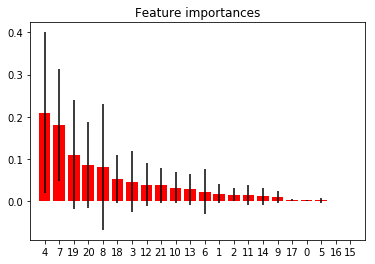

In [62]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [65]:
X_train.head(0).T

""
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape


From the above analysis, the most important features for the prediction is bruises and followed by gill-spacing in determining whether the mushroom is poisonous or not